## EDA Analysis for regression task on tabular data

#### First of all import all neccessary libraries

In [1]:
# data analysis
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

# regressors
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# hyperparameter tuning
from hyperopt import fmin, hp, tpe, space_eval, STATUS_OK

## EDA analysis stage

In [2]:
# read data
data = pd.read_csv("./data/train.csv")
hidden_test_data = pd.read_csv("./data/hidden_test.csv")
data.shape, hidden_test_data.shape

((90000, 54), (10000, 53))

Train.csv file contains 90000 observations and 53 anonymized features with target variable while hidden_test_data has 10000 examples without target 

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


### Explore train data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

We have 11 features with int datatype and 42 features with float type

In [5]:
# check whether train set has missing values
data.isnull().sum() / data.shape[0]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
30        0.0
31        0.0
32        0.0
33        0.0
34        0.0
35        0.0
36        0.0
37        0.0
38        0.0
39        0.0
40        0.0
41        0.0
42        0.0
43        0.0
44        0.0
45        0.0
46        0.0
47        0.0
48        0.0
49        0.0
50        0.0
51        0.0
52        0.0
target    0.0
dtype: float64

Dataset for training has no missing values

In [6]:
# check number of unique values in each feature
data.nunique()

0           500
1           500
2           500
3           500
4           500
5           500
6           199
7         90000
8             2
9           500
10          500
11          500
12          500
13        90000
14        90000
15        90000
16        90000
17        90000
18        90000
19        90000
20        90000
21        90000
22        90000
23        90000
24        90000
25        90000
26        90000
27        90000
28        90000
29        90000
30        90000
31        90000
32        90000
33        90000
34        90000
35        90000
36        90000
37        90000
38        90000
39        90000
40        90000
41        90000
42        90000
43        90000
44        90000
45        90000
46        90000
47        90000
48        90000
49        90000
50        90000
51        90000
52        90000
target    90000
dtype: int64

We have the following feature groups:
- 10 features with 500 unique values
- one feature with 2 unique values
- one feature with 199 unique values
- other features are continuous

<AxesSubplot: >

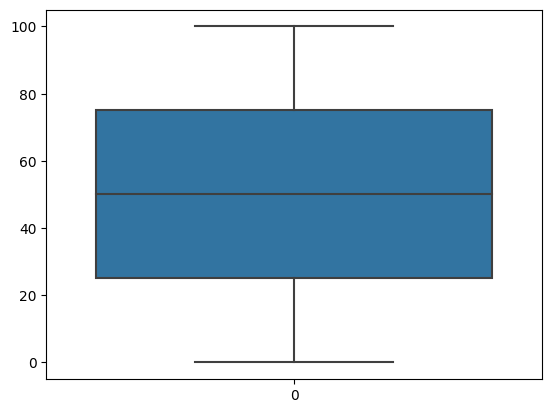

In [7]:
# Let's check outliers in target variable
sns.boxplot(data.target)

As we can see, we do not have any outliers in our target variable

In [8]:
# Let's see some statistical summary about features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


Key takeaways about this summary:
 - features from '0' to '5' and from '9' to '12' vary from 0 to 499 with almost the same mean and median (roughly 250)
 - feature with number 6 ranging from -9.94 to 9.94 with median 0
 - feature 7 has range [0,1] and has continuous nature
 - feature 8 is discrete feature which has value either 0 or 1 and 'evenly' distributed among the examples
 - other features have closely the same distribution with mean 7.5 and std 4.33 and ranging from 0 to 15 


It might be reasonable, to analyze one single feature from each group since all the features from their group have similar distribution

### Let's plot distribution of some features one more time

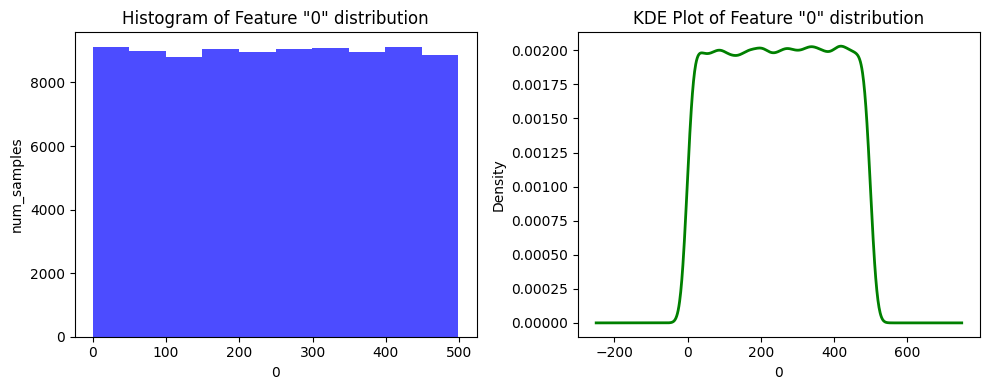

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot Histogram
axs[0].hist(data['0'], bins=10, color='blue', alpha=0.7)
axs[0].set_xlabel('0')
axs[0].set_ylabel('num_samples')
axs[0].set_title('Histogram of Feature "0" distribution')

# Plot KDE (Kernel Density Estimate)
data['0'].plot(kind='kde', ax=axs[1], color='green', linewidth=2)
axs[1].set_xlabel('0')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE Plot of Feature "0" distribution')

plt.tight_layout()
plt.show()

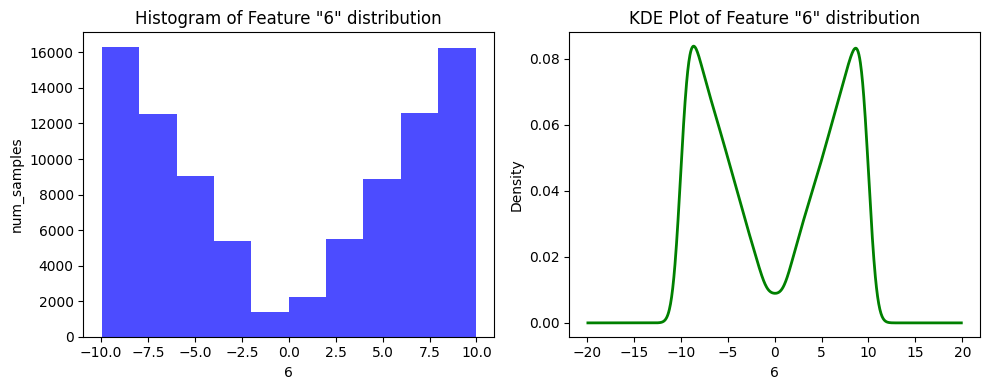

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot Histogram
axs[0].hist(data['6'], bins=10, color='blue', alpha=0.7)
axs[0].set_xlabel('6')
axs[0].set_ylabel('num_samples')
axs[0].set_title('Histogram of Feature "6" distribution')

# Plot KDE (Kernel Density Estimate)
data['6'].plot(kind='kde', ax=axs[1], color='green', linewidth=2)
axs[1].set_xlabel('6')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE Plot of Feature "6" distribution')

plt.tight_layout()
plt.show()

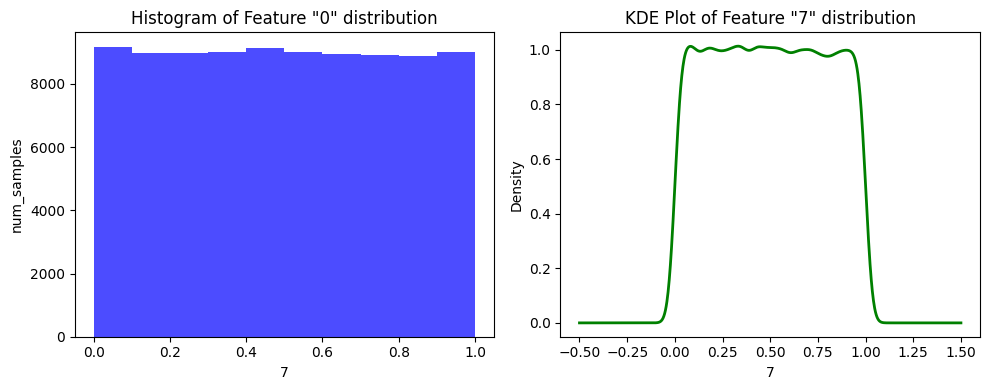

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot Histogram
axs[0].hist(data['7'], bins=10, color='blue', alpha=0.7)
axs[0].set_xlabel('7')
axs[0].set_ylabel('num_samples')
axs[0].set_title('Histogram of Feature "0" distribution')

# Plot KDE (Kernel Density Estimate)
data['7'].plot(kind='kde', ax=axs[1], color='green', linewidth=2)
axs[1].set_xlabel('7')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE Plot of Feature "7" distribution')

plt.tight_layout()
plt.show()

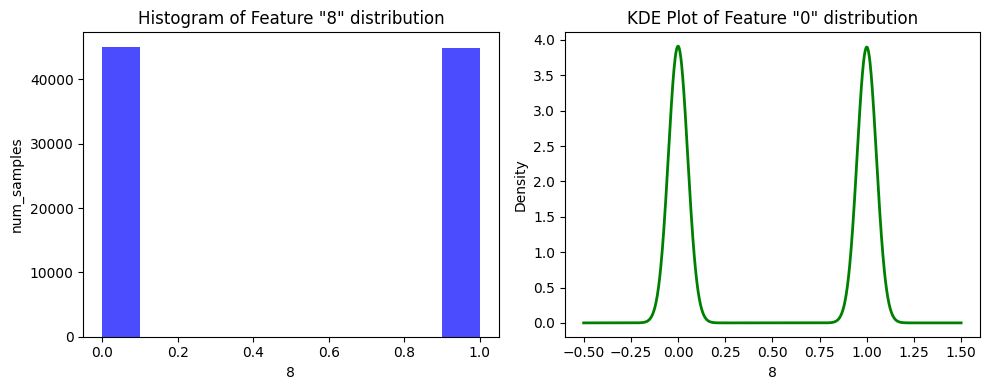

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot Histogram
axs[0].hist(data['8'], bins=10, color='blue', alpha=0.7)
axs[0].set_xlabel('8')
axs[0].set_ylabel('num_samples')
axs[0].set_title('Histogram of Feature "8" distribution')

# Plot KDE (Kernel Density Estimate)
data['8'].plot(kind='kde', ax=axs[1], color='green', linewidth=2)
axs[1].set_xlabel('8')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE Plot of Feature "0" distribution')

plt.tight_layout()
plt.show()

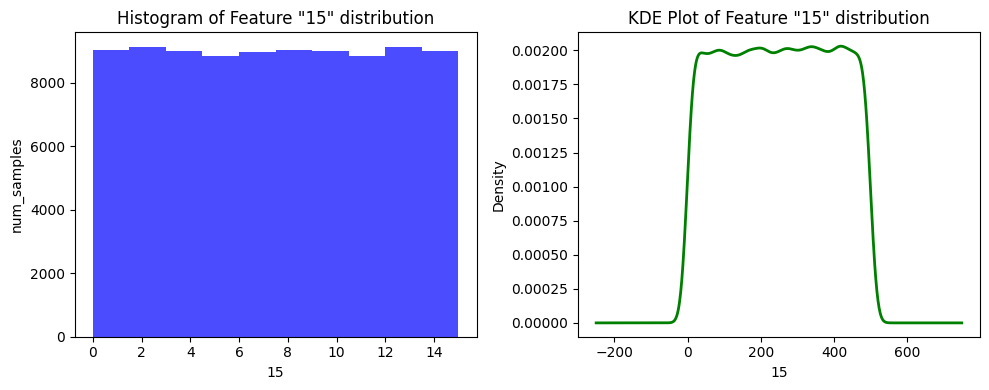

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot Histogram
axs[0].hist(data['15'], bins=10, color='blue', alpha=0.7)
axs[0].set_xlabel('15')
axs[0].set_ylabel('num_samples')
axs[0].set_title('Histogram of Feature "15" distribution')

# Plot KDE (Kernel Density Estimate)
data['0'].plot(kind='kde', ax=axs[1], color='green', linewidth=2)
axs[1].set_xlabel('15')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE Plot of Feature "15" distribution')

plt.tight_layout()
plt.show()

### Summarize about plots
 - Most of given features are evenly distributed over their ranges of values
 - feature number 6 is kind of similar to parabola (quadratic relationship)
 - feature '8' is discrete (0 or 1) and evenly distributed over examples 

### Let's see the scatterplot of some of the features

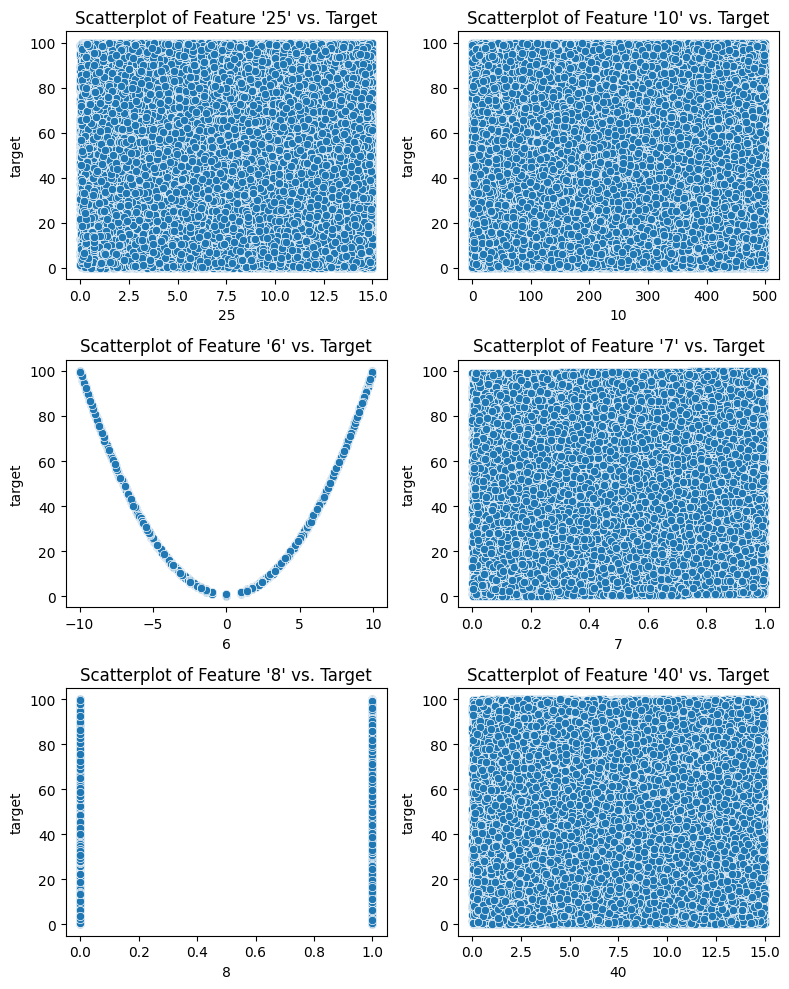

In [14]:
# Create a 2x1 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

# Scatterplot 1
sns.scatterplot(data=data, x="25", y="target", ax=axs[0,0])
axs[0,0].set_title("Scatterplot of Feature '25' vs. Target")

# Scatterplot 2
sns.scatterplot(data=data, x="10", y="target", ax=axs[0,1])
axs[0,1].set_title("Scatterplot of Feature '10' vs. Target")

# Scatterplot 2
sns.scatterplot(data=data, x="6", y="target", ax=axs[1,0])
axs[1,0].set_title("Scatterplot of Feature '6' vs. Target")

# Scatterplot 2
sns.scatterplot(data=data, x="7", y="target", ax=axs[1,1])
axs[1,1].set_title("Scatterplot of Feature '7' vs. Target")

# Scatterplot 2
sns.scatterplot(data=data, x="8", y="target", ax=axs[2,0])
axs[2,0].set_title("Scatterplot of Feature '8' vs. Target")

# Scatterplot 2
sns.scatterplot(data=data, x="40", y="target", ax=axs[2,1])
axs[2,1].set_title("Scatterplot of Feature '40' vs. Target")
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Takeaways:
 - As we assummed before, most of proposed features evenly distributed in "rectangle" in context of scatter plots
 - feature '6' looks like parabola and has quadratic relationship with target variable
 - feature '8' evenly distributed between 0 and 1 

### Let's view how proposed features correlate with target variable and between each other

For this purpose, we will plot heatmap and calculate pairwise correlation matrix

<AxesSubplot: >

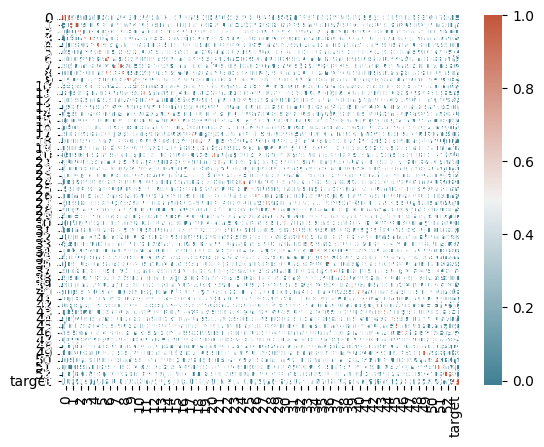

In [15]:
# calculate correlation matrix
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)) # plot heatmap

Because we have too many features, heatmap has very complicated view and it is tricky to make some conclusions about this representation

Let's try to explore correlation matrix and take a look some relationships

In [16]:
# calculate correlation matrix
corr_matrix = data.corr()# plot the heatmap
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.008011,0.002339,...,-4.142468e-03,-6.524791e-03,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612,0.002427
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.004095,0.002592,...,-2.874705e-03,-2.679358e-03,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173,-0.005545
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.001983,0.005753,...,1.091757e-03,-5.881274e-04,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812,0.001003
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000966,0.000202,...,-5.875674e-03,4.776979e-03,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534,0.002807
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,0.004763,-0.000778,...,-1.412970e-03,6.178204e-03,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388,-0.001300
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,-0.002289,0.004740,...,-1.159929e-03,-5.225882e-03,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946,-0.002125
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,0.940016,-0.007185,...,5.795666e-04,-3.255019e-05,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867,0.000666
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,0.000779,-0.007187,...,-5.102514e-03,2.936529e-03,0.003277,-0.001273,-0.000669,0.001930,0.001085,0.008363,0.001724,0.012103
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,...,3.567263e-04,-1.795987e-03,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347
9,0.002339,0.002592,0.005753,0.000202,-0.000778,0.004740,-0.007185,-0.007187,-0.007370,1.000000,...,1.202068e-03,1.417241e-03,-0.002239,0.002636,0.004146,0.001255,-0.000016,-0.003785,-0.003467,0.001504


At the first glance, we might see, almost all pair correlation of features are closely to 0 except for pair '6' and '8' which has strong positive correlation  roughly equally 0.94

## Model building, selection and evaluation stage

In this section we are going to do these steps:
 - build some model for solving regression problem and evaluate them with cross validation method. Compare them based on RMSE metric. Select most appropriate model.
 - look at the feature importance
 - make hyperparameter tuning for selected model.

Since in our hidden_test.csv file we don't have target column, we are gonna use cross-validation approache to build some popular regressors and compare each other based on RMSE target metric.

In [17]:
scorer = make_scorer(mean_squared_error, squared=False) # determine RMSE scorer

cv = KFold(n_splits=5, shuffle=True, random_state=2023)  # Determine cross validation splitting strategy

In [18]:
# Split feature matrix and target variable
X = data.drop('target', axis=1)
y = data['target']

### Build some model regressors with default hyperparameters at first

In [19]:
lr = LinearRegression()

rmse_scores = cross_val_score(lr, X=X, y=y, cv=cv, scoring=scorer)

print(f"Average RMSE for linear regressor: {np.mean(rmse_scores)}")

Average RMSE for linear regressor: 28.907445737703988


In [20]:
ridge_regression = Ridge()

rmse_scores = cross_val_score(ridge_regression, X=X, y=y, cv=cv, scoring=scorer)

print(f"Average RMSE for Ridge regressor: {np.mean(rmse_scores)}")

Average RMSE for Ridge regressor: 28.907445613134183


In [21]:
rf = RandomForestRegressor(max_depth=5) # we set max_depth = 5 because it takes too much time for building rf regressor with default value parameter

rmse_scores = cross_val_score(rf, X=X, y=y, cv=cv, scoring=scorer)

print(f"Average RMSE for RandomForest regressor: {np.mean(rmse_scores)}")

Average RMSE for RandomForest regressor: 3.441132411280802


In [22]:
xgb = XGBRegressor()

rmse_scores = cross_val_score(xgb, X=X, y=y, cv=cv, scoring=scorer)

print(f"Average RMSE for XGB regressor: {np.mean(rmse_scores)}")

Average RMSE for XGB regressor: 0.038608616467247246


In [23]:
lgbm = LGBMRegressor(verbose=-1) # set verbose=-1 for excepting any logs from LightGBM library

rmse_scores = cross_val_score(lgbm, X=X, y=y, cv=cv, scoring=scorer)

print(f"Average RMSE for LightGBM  regressor: {np.mean(rmse_scores)}")

Average RMSE for LightGBM  regressor: 0.020462966557247105


Since LightGBM has the best trade-off between quality based on RMSE metric and fitting time, we will make a choice in its favor.

We don't need to make data normalization / data standardization because LightGBM method is not sensitive to the scale of features.

In [24]:
# fitting LightGBM regressor and get a model
lgbm.fit(X,y)

LGBMRegressor(verbose=-1)

### Let's see feature importance that we got when lightgbm regressor was fitting

<AxesSubplot: >

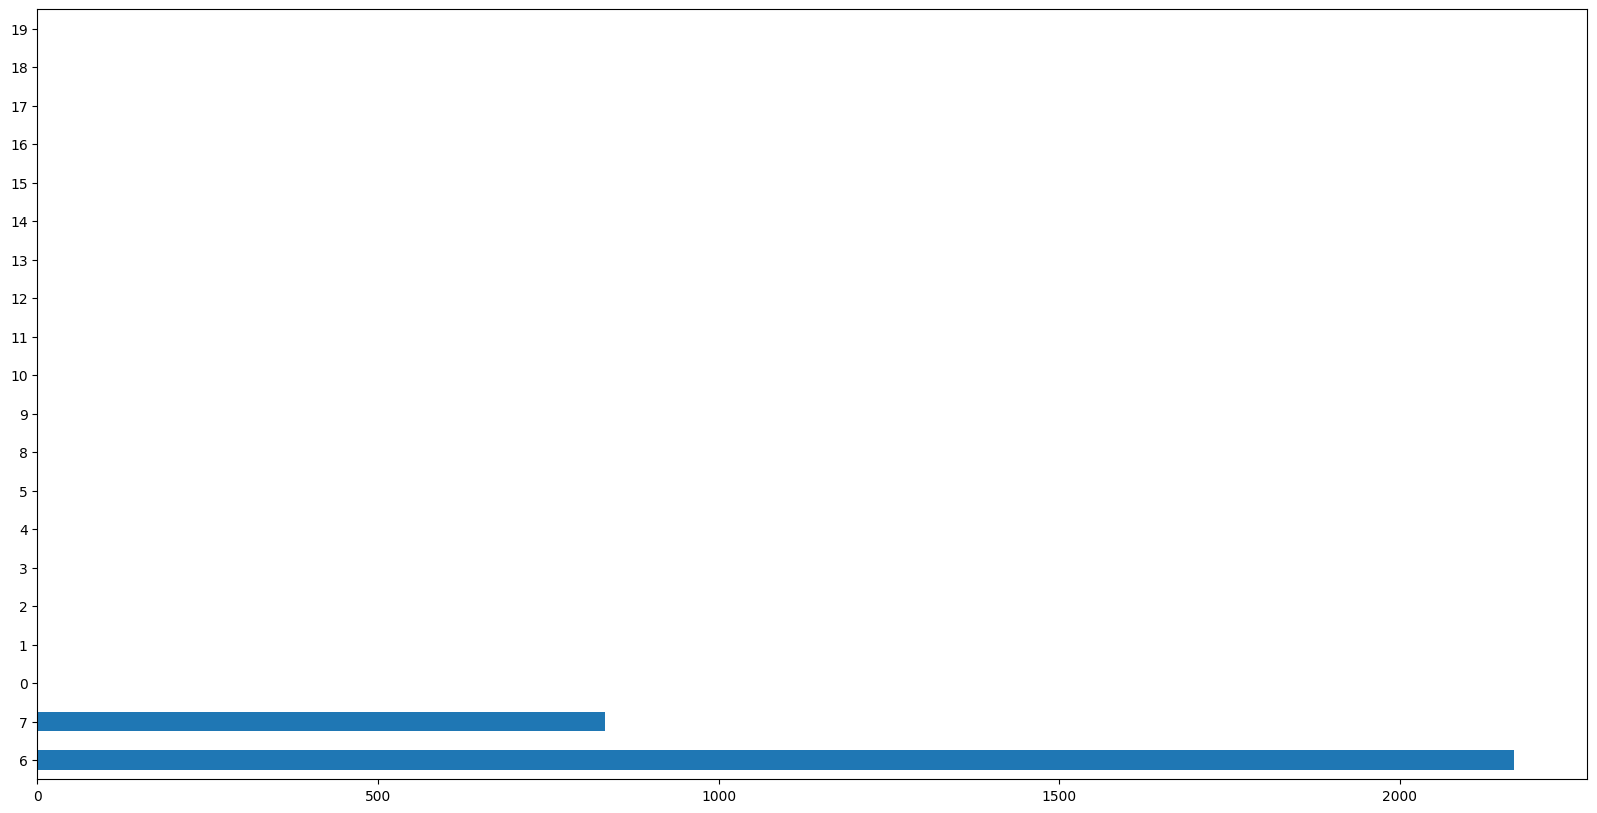

In [25]:
feature_importance = pd.Series(lgbm.feature_importances_, X.columns)
feature_importance.nlargest(20).plot(kind='barh', figsize=(20,10))

We might see, the most important features are feature number '6' and feature number '7'. Other features actually don't have any importance.
Let's try to leave these two feature and perform cross validation again.

In [26]:
X_selected_features = X[['6','7']]

lgbm = LGBMRegressor(verbose=-1)

rmse_scores = cross_val_score(lgbm, X=X_selected_features, y=y, cv=cv, scoring=scorer)

print(f"Average RMSE for LightGBM  regressor: {np.mean(rmse_scores)}")

Average RMSE for LightGBM  regressor: 0.020462966557247105


Thus, we have got the same result leaving only two features from entire dataset. Additionally, fitting time has decreased about 50 % which is also good result

### Let's move forward and try to tweak lightgbm hyperparameters in order achieve better performance

For this purpose we will use hyperopt library.

In [36]:
# define objective
def objective(search_space):
    model = LGBMRegressor(**search_space, random_state=2023, verbose=-1)
    rmse_scores = cross_val_score(model, X_selected_features, y, cv=cv, scoring=scorer)
    return {'loss': np.mean(rmse_scores), 'status': STATUS_OK}

# define search space
lgbm_search_space={'n_estimators': hp.randint('n_estimators', 50, 250),
              
                   'num_leaves': hp.randint('num_leaves', 10, 100),           

                   'learning_rate': hp.uniform('learning_rate', 0,1),
                   
                   'subsample': hp.uniform('subsample', 0.1, 1.0),
                   'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1.0),

                   'reg_alpha' : hp.choice('reg_alpha', [0, 1e-5, 1e-2, 0.1, 1, 10, 100]), 
                   'reg_lambda' : hp.choice('reg_lambda', [0, 1e-5, 1e-2, 0.1, 1, 10, 100])
             }

# implement Hyperopt
best_params = fmin(
  fn=objective,
  space=lgbm_search_space,
  algo=tpe.suggest,
  max_evals=50)


space_eval(lgbm_search_space, best_params)

100%|██████████| 50/50 [03:42<00:00,  4.46s/trial, best loss: 0.0011446106911602823]


{'colsample_bytree': 0.36690618796714114,
 'learning_rate': 0.9029828392216283,
 'n_estimators': 135,
 'num_leaves': 22,
 'reg_alpha': 1e-05,
 'reg_lambda': 1e-05,
 'subsample': 0.578273018441536}

After hyperpameter tuning we achieved even better performance (from 0.02 to 0.001 based on RMSE metric)

Let's take the resulting hyperparameters, round them and retrain the model

In [27]:
params = {'colsample_bytree': 0.36,
 'learning_rate': 0.90,
 'n_estimators': 135,
 'num_leaves': 22,
 'reg_alpha': 1e-05,
 'reg_lambda': 1e-05,
 'subsample': 0.58}

In [28]:
# let's rebuild model with tweaked hyperparameter

resulted_model = LGBMRegressor(**params, random_state=2023, verbose=-1)
rmse_scores = cross_val_score(resulted_model, X_selected_features, y, cv=cv, scoring=scorer)

print(np.mean(rmse_scores))

0.0011446421010501567


### After all these steps, let's move to implement train.py and test.py scripts with our gained insights!